Mohammed Abdul Khaliq


# Milestone I

In [1]:
!pip install geopandas

In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import graphviz
import descartes
import geopandas as gpd

from shapely.geometry import Point, Polygon

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load in the data
pd.set_option('display.max_columns', None)

missing_values = ["n/a", "na", "--", "-", "NA", "NaN"]
housing = pd.read_csv("housing.csv", low_memory=False, na_values = missing_values)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## I. Cleaning data

In [5]:
# number of instances in the original dataset
housing.shape

(20640, 10)

In [6]:
# data types
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.dropna(inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.describe(include=["O"])

,ocean_proximity
count,20433
unique,5
top,<1H OCEAN
freq,9034


## II. Single Variable Distribution

Text(0, 0.5, 'Frequency')

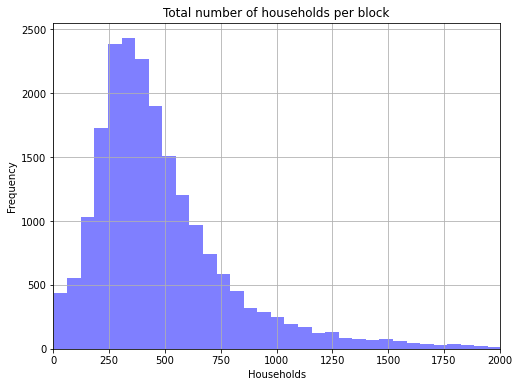

In [12]:
housing["households"].plot(kind="hist", figsize=(8,6),\
                           bins=100, xlim=(0, 2000), \
                           alpha=0.5, color="b", grid=True)

plt.title("Total number of households per block")
plt.xlabel("Households")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

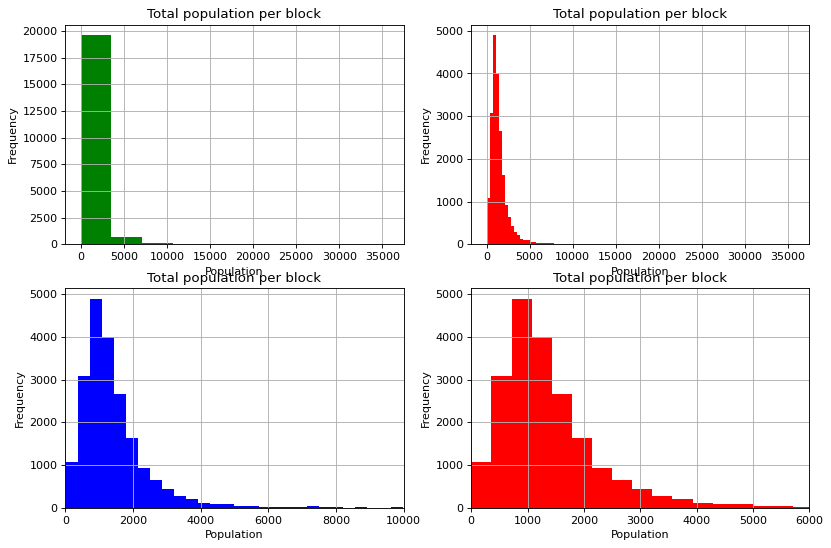

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

plt.subplot(221)
housing["population"].plot(kind="hist", facecolor="g", grid=True)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(222)
housing["population"].plot(kind="hist", bins=100, facecolor="r", grid=True)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(223)
housing["population"].plot(kind="hist", bins=100, facecolor="b", grid=True)
plt.xlim(0, 10000)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(224)
housing["population"].plot(kind="hist", bins=100, facecolor="r", grid=True)
plt.xlim(0, 6000)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

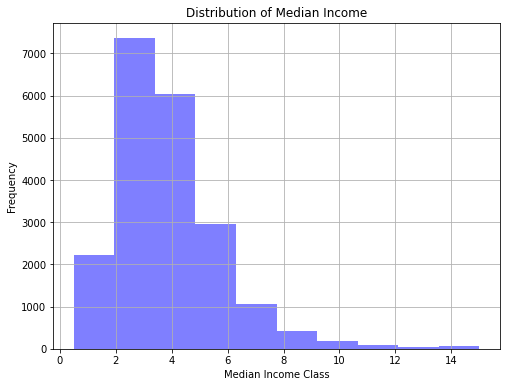

In [14]:
housing["median_income"].plot(kind="hist", figsize=(8,6),\
                        alpha=0.5, color="b", grid=True)

plt.title("Distribution of Median Income")
plt.xlabel("Median Income Class")
plt.ylabel("Frequency")

In [15]:
proximity = housing.groupby(["ocean_proximity"]).size().reset_index(name="total")
proximity

,ocean_proximity,total
0,<1H OCEAN,9034
1,INLAND,6496
2,ISLAND,5
3,NEAR BAY,2270
4,NEAR OCEAN,2628


Text(-2.450000000000003, 0.5, 'Frequency')

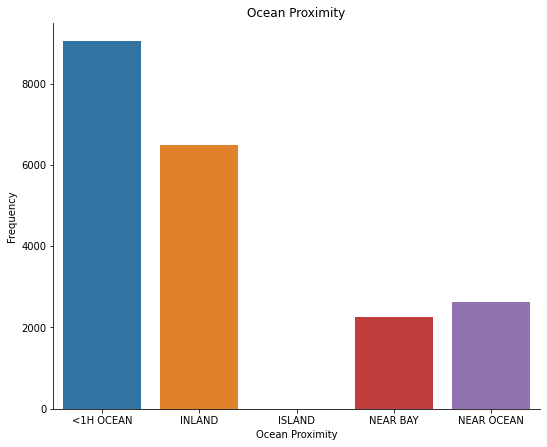

In [16]:
# household proximity to ocean

g = sns.catplot(x = "ocean_proximity", \
                y = "total", \
                kind="bar", \
                data = proximity)
g.fig.set_size_inches(8, 6)
plt.title("Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Frequency")

## III. Multiple Variable Distribution

In [17]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


Text(0, 0.5, 'Median Income in ($)')

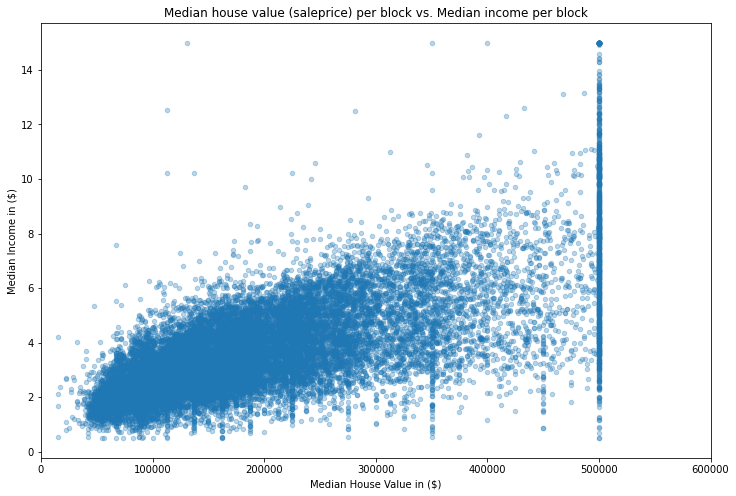

In [18]:
housing.plot.scatter(x = "median_house_value", \
                     y = "median_income", \
                     xlim=(0, 600000), \
                     figsize=(12,8), \
                     alpha=0.3)
plt.title("Median house value (saleprice) per block vs. Median income per block")
plt.xlabel("Median House Value in ($)")
plt.ylabel("Median Income in ($)")

Text(9.669950810185185, 0.5, 'Latitude')

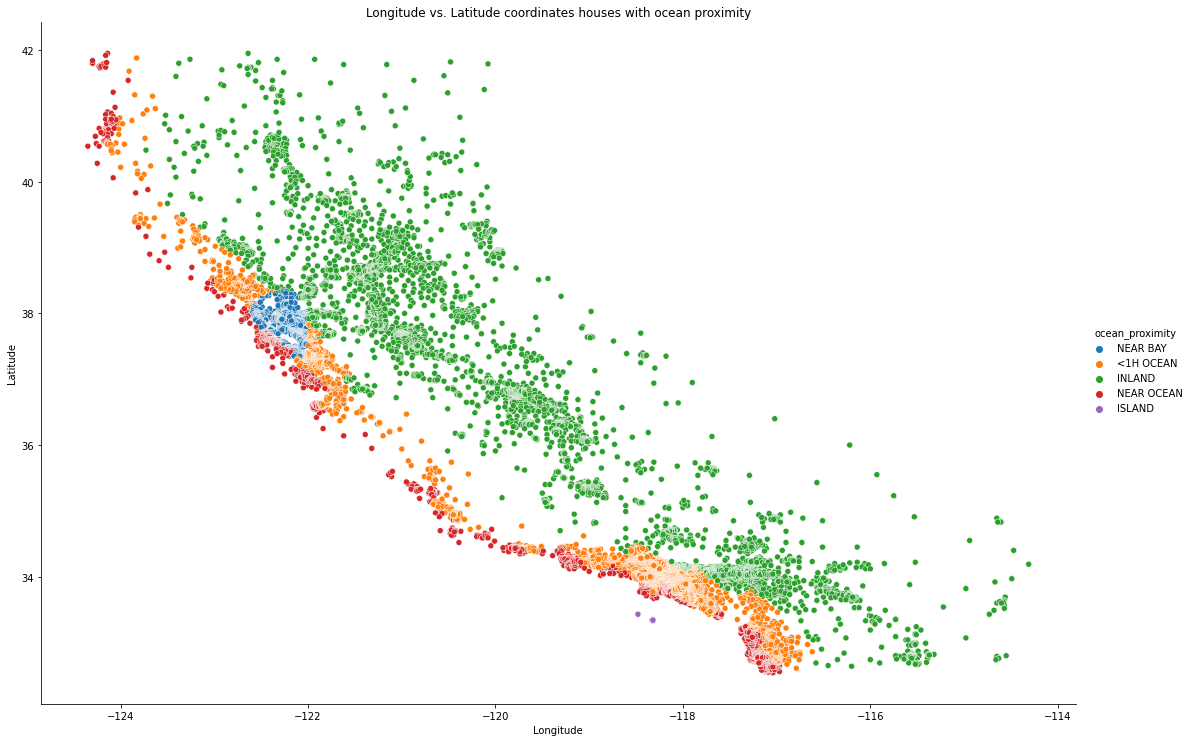

In [19]:
sns.relplot(x = "longitude", \
            y = "latitude", \
            hue = "ocean_proximity", \
            data = housing, \
            height=10, \
            aspect=1.5)

plt.title("Longitude vs. Latitude coordinates houses with ocean proximity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(-14.950000000000003, 0.5, 'Median House Value')

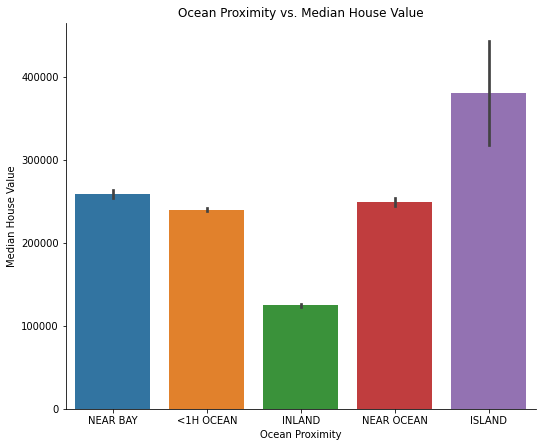

In [20]:
g = sns.catplot(x = "ocean_proximity", \
            y = "median_house_value", \
            kind = "bar", \
            data = housing)

g.fig.set_size_inches(8, 6)
plt.title("Ocean Proximity vs. Median House Value")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")

# Milestone II

# Model 1: Decision Tree Regression

In [21]:
# getting dummy variables for categorical data

housing2 = pd.get_dummies(housing, \
                           columns = ["ocean_proximity"], \
                           drop_first = True)
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [22]:
# dividing the data into independent and dependent variables

x = housing2.drop("median_house_value", axis=1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [23]:
# dependent variable

y = housing2["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [24]:
# splitting the data into training and testing set for modeling

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
815,-122.04,37.61,36.0,1151.0,216.0,727.0,215.0,4.1719,0,0,1,0


In [26]:
x_test.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5417,-118.43,34.01,43.0,1487.0,242.0,675.0,247.0,5.3403,0,0,0,0


In [27]:
y_train.head(1)

815    187000.0
Name: median_house_value, dtype: float64

In [28]:
y_test.head(1)

5417    489800.0
Name: median_house_value, dtype: float64

In [29]:
from sklearn.tree import plot_tree

In [30]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(581.25, 990.9375, 'X[7] <= 5.038\nmse = 13302677469.597\nsamples = 16346\nvalue = 206696.572'),
 Text(290.625, 707.8125, 'X[8] <= 0.5\nmse = 8371635346.939\nsamples = 12877\nvalue = 173319.164'),
 Text(145.3125, 424.6875, 'X[7] <= 3.074\nmse = 8195816145.219\nsamples = 8201\nvalue = 208282.889'),
 Text(72.65625, 141.5625, 'mse = 6004573127.097\nsamples = 3473\nvalue = 170691.485'),
 Text(217.96875, 141.5625, 'mse = 8004913187.041\nsamples = 4728\nvalue = 235896.033'),
 Text(435.9375, 424.6875, 'X[7] <= 3.036\nmse = 2775702863.196\nsamples = 4676\nvalue = 111998.054'),
 Text(363.28125, 141.5625, 'mse = 1498740267.054\nsamples = 2654\nvalue = 90431.009'),
 Text(508.59375, 141.5625, 'mse = 3039926237.753\nsamples = 2022\nvalue = 140306.134'),
 Text(871.875, 707.8125, 'X[7] <= 6.887\nmse = 12120803501.985\nsamples = 3469\nvalue = 330594.202'),
 Text(726.5625, 424.6875, 'X[8] <= 0.5\nmse = 8840502191.573\nsamples = 2453\nvalue = 291703.767'),
 Text(653.90625, 141.5625, 'mse = 79270599

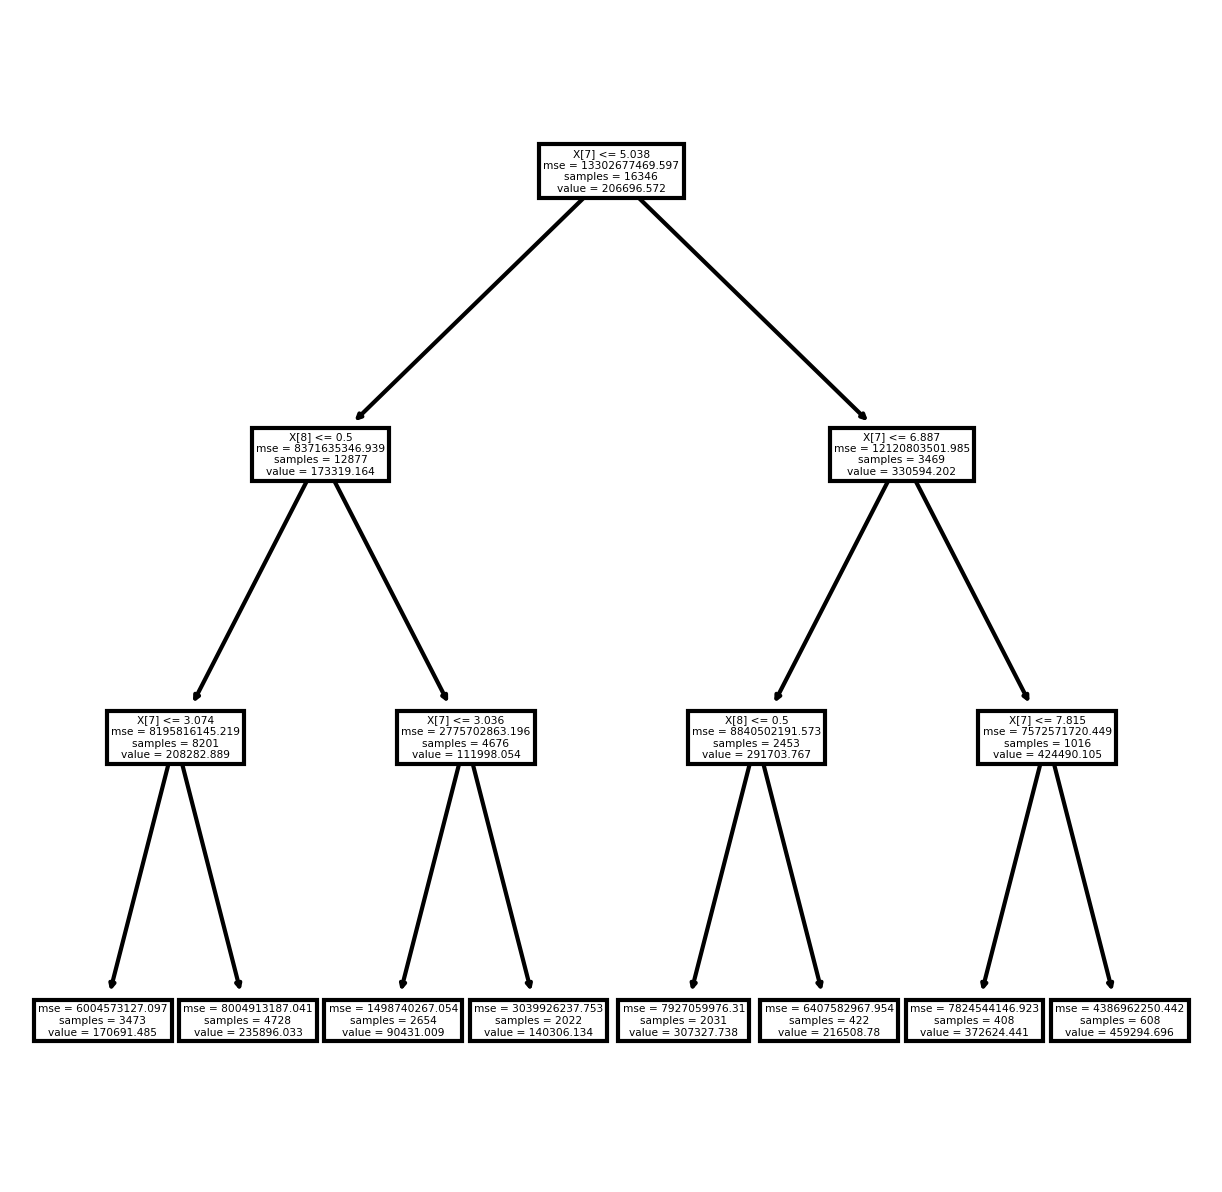

In [31]:
# displaying the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model)

In [32]:
dot_data = export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("housing.dot")

'housing.dot.pdf'

In [33]:
housing2.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0


In [34]:
# fixing the column names

with open ("housing.dot", "r") as fin:
    with open("housing_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[7]","carat")
            line = line.replace("X[8]","ocean_proximity_INLAND")
            fout.write(line)

In [35]:
# creating a decision tree with a max depth of 3 from the training data

reg3 = DecisionTreeRegressor(max_depth=3)
reg3 = reg3.fit(x_train, y_train)

In [36]:
# making predictions on the test

predictions_3 = reg3.predict(x_test)

In [37]:
# computing mean squared error

mean_squared_error(predictions_3, y_test)

5881807648.249935

In [38]:
# making predictions on the training data

pred3 = reg3.predict(x_train)

In [39]:
# computing the mean squared error

mean_squared_error(pred3, y_train)

5719383667.246453

# Analysis

The two mean squared errors are very close together (for their magnitudes) so this does not suggest overfitting is happening. However, we cannot tell if underfitting is happening.

In [40]:
# trying the model with different parameters or max depths to see if there is a difference

tree5 = DecisionTreeRegressor(max_depth = 5)
tree5.fit(x_train,y_train)
train_preds5 = tree5.predict(x_train)
test_preds5 = tree5.predict(x_test)
mean_squared_error(train_preds5,y_train)

4747047464.964932

In [41]:
# computing the mean squared error

mean_squared_error(test_preds5,y_test)

4924077244.313878

In [42]:
# trying the model with different parameters or max depths to see if there is a difference

tree10 = DecisionTreeRegressor(max_depth = 10)
tree10.fit(x_train,y_train)
train_preds10 = tree10.predict(x_train)
test_preds10 = tree10.predict(x_test)
mean_squared_error(train_preds10,y_train)

2154731986.9350243

In [43]:
# computing the mean squared error

mean_squared_error(test_preds10,y_test)

3734853330.353615

# Analysis

I looked at decisions trees with max depths 3, 5, and 10. The mean squared errors (MSE) for the depth 10 tree were the lowest, but the test MSE was somewhat higher than the training MSE so this might indicate some overfitting. For the depths 3 and 5 trees, the training and testing MSEs are similar, so there is no overfitting, but the depth 5 tree has lower MSEs than the depth 3 tree. So the depth 5 tree would be the best model of the 3 tested, but likely a tree with a depth between 5 and 10 is the best model.

## M 2.2: Comparing the model with Linear Regression

In [44]:
# comparing models to see which model better predicts the price

lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
lin_pred_train = lin_model.predict(x_train)
lin_pred_test = lin_model.predict(x_test)
mean_squared_error(lin_pred_train,y_train)

4721623189.96357

In [45]:
mean_squared_error(lin_pred_test,y_test)

4671384088.260871

## Analysis

The training and testing MSEs for the linear regression model are similar, and less than the decision tree models with depths 3 and 5. The MSEs are not as good as those of the decision tree with depth 10, but there was some indications of overfitting. So the linear regression model is probably the best one we tried, but a decision tree with depth between 5 and 10 may be better.

## Model 2: K-Nearest Neighbors

In [46]:
# splitting the data into training and testing set for modeling

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
# fitting a k-nearest neighbor regression model with k=5 to the training data
# and will use it to predict prices for both the test and training data

knn5 = KNeighborsRegressor(n_neighbors = 5)
knn5.fit(x_train, y_train)
y_test_pred = knn5.predict(x_test)
y_train_pred = knn5.predict(x_train)

In [48]:
# calculating the mean squared error for test set

mean_squared_error(y_test_pred, y_test)

10031647956.905565

In [49]:
# calculating the mean squared error for train set

mean_squared_error(y_train_pred, y_train)

6505311952.828146

In [50]:
knn3 = KNeighborsRegressor(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_test_pred3 = knn3.predict(x_test)
y_train_pred3 = knn3.predict(x_train)

In [51]:
mean_squared_error(y_test_pred3, y_test)

10840315041.725636

In [52]:
mean_squared_error(y_train_pred3, y_train)

5377666269.8694

In [53]:
knn10 = KNeighborsRegressor(n_neighbors = 10)
knn10.fit(x_train, y_train)
y_test_pred10 = knn10.predict(x_test)
y_train_pred10 = knn10.predict(x_train)

In [54]:
mean_squared_error(y_test_pred10, y_test)

9292308291.495256

In [55]:
mean_squared_error(y_train_pred10, y_train)

7562573273.7784

# Analysis

The MSE for the training data is significantly lower than the MSE for the testing data. This could indicate overfitting of the model.

In [56]:
# scaling the training and testing data to be between 0 and 1

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [57]:
# Now, fitting a k-nearest neighbor regression model with k=5 
# to the scaled training data and using it to predict the prices for
# both the scaled test and training data

knn5_scaled = KNeighborsRegressor(n_neighbors = 5)
knn5_scaled.fit(x_train_scaled, y_train)
y_pred_train_scaled = knn5_scaled.predict(x_train_scaled)
y_pred_test_scaled = knn5_scaled.predict(x_test_scaled)

In [58]:
mean_squared_error(y_pred_train_scaled,y_train)

2549113270.7191677

In [59]:
mean_squared_error(y_pred_test_scaled,y_test)

4556345242.132166

# Analysis

The scaled training MSE is half the magnitude of the scaled testing MSE, indicating over-fitting. Both MSEs are a quarter to a third the size of the unscaled MSEs, which is very significant and suggests scaling greatly improves the prediction ability of K-Nearest Neighbors.

In [60]:
train_mses = []
test_mses = []
for k in range(1,11):
    print("Now computing MSE for k=",k)
    
    # Initialize the k-nearest neighbors regressor variable with k neighbors
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    
    # Fit it to the scaled training data
    iknn_scaled.fit(x_train_scaled, y_train)
    
    # Predict using the scaled testing data, compute the MSE, 
    # and add to the test MSE list
    iy_test_pred_scaled = iknn_scaled.predict(x_test_scaled)
    test_mse = mean_squared_error(iy_test_pred_scaled, y_test)
    test_mses.append(test_mse)
    
    # Predict using the scaled training data, compute the MSE, 
    # and adding to the train MSE list
    iy_train_pred_scaled = iknn_scaled.predict(x_train_scaled)
    train_mse = mean_squared_error(iy_train_pred_scaled, y_train)
    train_mses.append(train_mse)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5
Now computing MSE for k= 6
Now computing MSE for k= 7
Now computing MSE for k= 8
Now computing MSE for k= 9
Now computing MSE for k= 10


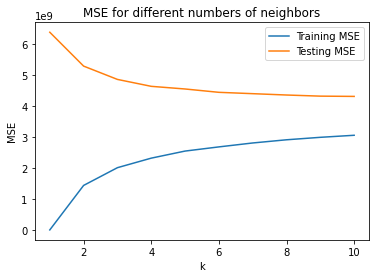

In [61]:
xx = np.linspace(1,10,10)

plt.plot(xx,pd.Series(train_mses))
plt.plot(xx,pd.Series(test_mses))
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")
plt.legend(["Training MSE","Testing MSE"])

# Analysis

I would recommend using k = 8 for the nearest neighbor regressor for the insurance data. It appears to have the smallest testing MSE, and the gap between the training MSE and testing MSE has closed somewhat from smaller k

# Milestone III
- A plot of heat map

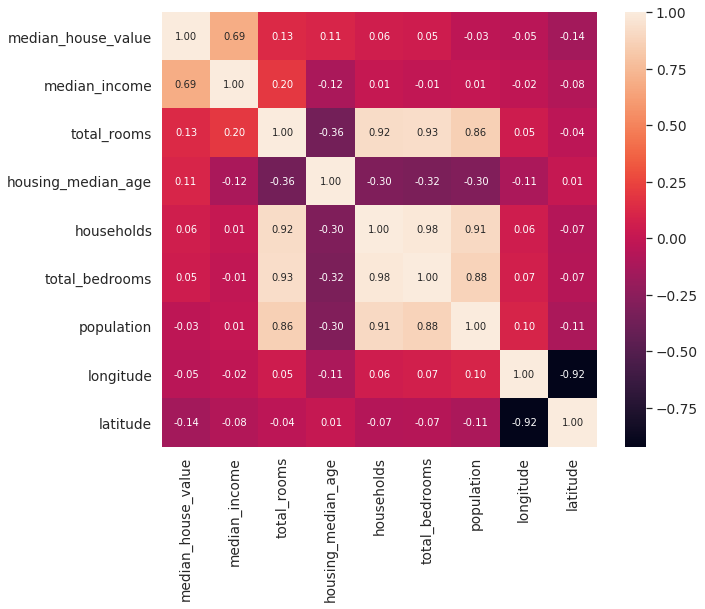

In [62]:
# checking correlations between variables

correlations = housing.corr()

k = 10
cols = correlations.nlargest(k, "median_house_value")["median_house_value"].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# K-Means clustering algorithm with inertia and elbow method

In [63]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 1.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 1.        ,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        0.        ]])

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [65]:
kmeans.inertia_

5055.214791036384

In [66]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

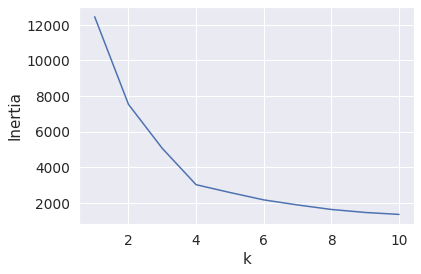

In [67]:
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

# Analysis

Based on the graph, I think the elbow occurs at k = 4, so there should be 4 clusters in the data.

In [68]:
silhouette_score(x_scaled,clusters)

0.39908302395481715

In [69]:
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    score = silhouette_score(x_scaled, clusters)
    silhouette_scores.append(score)

In [70]:
silhouette_scores

[0.4279072513049073,
 0.5141417649271204,
 0.5803328212074321,
 0.522427071478935,
 0.46185966924246286,
 0.4343418924274649,
 0.43434077890372236,
 0.4228137971770749,
 0.3990926770738657]

Text(0, 0.5, 'Silhouette Score')

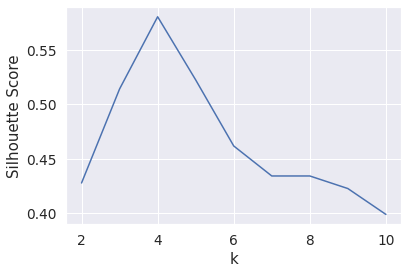

In [71]:
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")

# Analysis

Based on the plot of the silhouette scores, I think this data contains k=4 clusters, since that is the highest of the silhouette scores.